In [1]:
# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [2]:
from pprint import pprint
import msea
from msea import SetLibrary

In [3]:
gmt_filepath = \
    'https://bitbucket.org/wangz10/msea/raw/aee6dd184e9bde152b4d7c2f3c7245efc1b80d23/msea/data/human_genes_associated_microbes/set_library.gmt'

d_gmt = msea.read_gmt(gmt_filepath)
print('Number of microbe-sets:', len(d_gmt))
# Look at a couple of reference sets in the library
pprint(list(d_gmt.items())[:3])

Number of microbe-sets: 1286
[('A2M', {'Borrelia', 'Salmonella', 'Pseudomonas', 'Azomonas', 'Sodalis'}),
 ('AAAS',
  {'Colwellia',
   'Deinococcus',
   'Idiomarina',
   'Neisseria',
   'Pseudidiomarina',
   'Pseudoalteromonas'}),
 ('AACS',
  {'Acetobacter',
   'Acinetobacter',
   'Azomonas',
   'Corynebacterium',
   'Enterobacter',
   'Klebsiella',
   'Mycobacterium',
   'Mycoplasma',
   'Pseudomonas',
   'Sodalis',
   'Staphylococcus',
   'Streptomyces',
   'Tetragenococcus'})]


In [4]:
# Example list
microbe_set_input = set(['Eubacterium xylanophilum',
                         'Muribaculaceae',
                         'A2',
                         'Turicibacter',
                         'Eubacterium nodatum',
                         'Muribaculaceae',
                         'Clostridia vadin',
                         'Blautia',
                         'Incertae Sedis',
                         'Lachnoclostridium',
                         'Turicibacter',
                         'Lactobacillus',
                         'Escherichia Shigella'
                         'Incertae Sedis',
                         'Bifidobacterium',
                         'Muribaculaceae'])
# this can be done using the `msea.enrich` function
msea_result = msea.enrich(microbe_set_input, d_gmt=d_gmt, universe=1000)
# check the top enriched reference microbe-sets
print(msea_result.head())

          oddsratio    pvalue    qvalue  \
term                                      
HLA-DPB1  35.714286  0.000289  0.296043   
FUT2      15.151515  0.000460  0.296043   
BMI1      13.888889  0.014336  0.317863   
CCL24     23.809524  0.005954  0.317863   
LGR5      15.151515  0.012408  0.317863   

                                                     shared  n_shared  
term                                                                   
HLA-DPB1          [Blautia, Bifidobacterium, Lactobacillus]         3  
FUT2      [Blautia, Bifidobacterium, Turicibacter, Lacto...         4  
BMI1                          [Turicibacter, Lactobacillus]         2  
CCL24                      [Bifidobacterium, Lactobacillus]         2  
LGR5                       [Bifidobacterium, Lactobacillus]         2  


In [5]:
set_library = SetLibrary.load(gmt_filepath)

In [6]:
set_library.get_empirical_ranks(n=20)
print(set_library.rank_means.shape, set_library.rank_stds.shape)

Calculating empirical ranks for each set...
Number of unique microbes: 566


100%|█████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.41it/s]

(1286,) (1286,)


In [7]:
msea_result_adj = set_library.enrich(
    microbe_set_input, adjust=True, universe=1000)
print(msea_result_adj)

/usr/local/lib/python3.9/site-packages/msea/set_library.py:70: RuntimeWarning: 8 of the 12 microbes in the input_set do(es) not exist in the reference set library: Incertae Sedis;Lachnoclostridium;A2;Eubacterium xylanophilum;Muribaculaceae;Clostridia vadin;Escherichia ShigellaIncertae Sedis;Eubacterium nodatum
  warnings.warn(


          oddsratio    pvalue    qvalue    zscore  combined_score  \
term                                                                
EPX       33.333333  0.003542  0.317863 -2.992559       16.887339   
EHF       12.820513  0.016382  0.344474 -3.627983       14.916633   
S100A9    13.888889  0.014336  0.317863 -2.801018       11.890277   
EGF        5.376344  0.069450  0.513602 -3.471916        9.260115   
FOXO3      9.803922  0.025673  0.428770 -2.322204        8.504657   
...             ...       ...       ...       ...             ...   
MECP2     16.666667  0.010601  0.317863  1.969938       -8.956909   
IL1B       4.237288  0.050697  0.513602  3.091803       -9.219437   
HLA-DPB1  35.714286  0.000289  0.296043  1.155825       -9.417893   
MX2       13.888889  0.014336  0.317863  2.461668      -10.449740   
MUC4      10.000000  0.006410  0.317863  3.055589      -15.430631   

                                                  shared  n_shared  
term                             

In [9]:
### gseapy
from gseapy import Biomart
bm = Biomart()

In [ ]:
# mouse
mouse = gp.get_library_name(organism='Mouse')
mouse

In [ ]:
## download library or read a .gmt file
#go_mf = gp.get_library(name='GO_Molecular_Function_2021', organism='Mouse')

In [ ]:
#print(go_mf['ATP binding (GO:0005524)'])

In [10]:
gene_list = msea_result_adj.index.to_list()

In [11]:
# run enrichr
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2019_Mouse'],
                 organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [12]:
from gseapy import barplot, dotplot

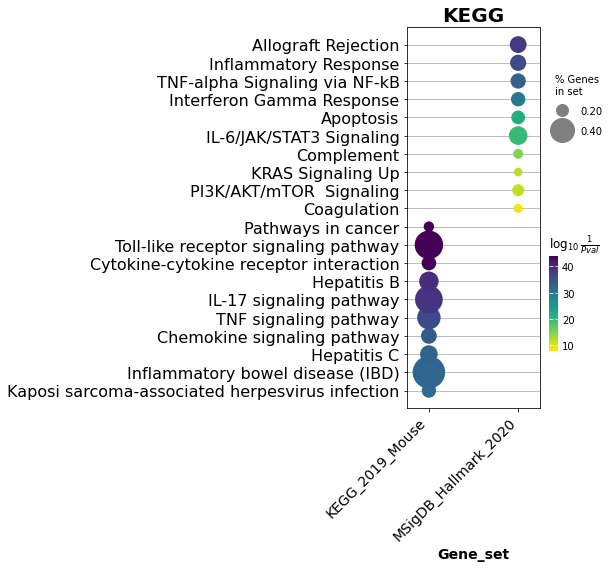

In [13]:
# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,7),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
              marker='o',
             )

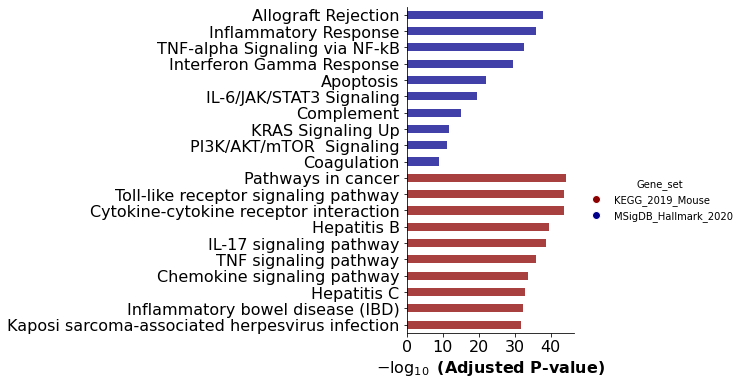

In [14]:
# categorical scatterplot
ax1 = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,6),
              color=['darkred', 'darkblue'] # set colors for group
             )

In [ ]:
ax = ax.figure
ax.savefig('/Users/natmurad/Documents/results/dotEnrich.pdf',
                  format="pdf", 
                  bbox_inches='tight')


In [ ]:
ax1 = ax1.figure
ax1.savefig('/Users/natmurad/Documents/results/barEnrich.pdf',
                  format="pdf", 
                  bbox_inches='tight')
